In [ ]:
from statistics import mean
import numpy as np
import random

def create_dataset(hm, variance, step = 2, correlation = False):
    val = 1
    y = []
    for i in range(hm):
        v = val + random.randrange(-variance, variance)
        y.append(v)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
            
    x = [i for i in range(hm)]
    
    return np.array(x, dtype = np.float64), np.array(y, dtype = np.float64)

def linear_slope_and_intercept(x, y):
    m = mean(x) * mean(y) - mean(x * y)
    m /= mean(x) ** 2 - mean(x ** 2)
    
    b = mean(y) - m * mean(x)
    
    return m, b

def squared_error(y_orig, y_line):
    return sum((y_line - y_orig) ** 2)

def coefficient_of_determination(y_orig, y_regr):
    y_mean = [mean(y_orig) for _ in y_orig]
    sqrd_err_regr = squared_error(y_orig, y_regr)
    sqrd_err_mean = squared_error(y_orig, y_mean)
    
    return 1 - sqrd_err_regr / sqrd_err_mean

x, y = create_dataset(50, 10, 2, correlation = 'pos')

m, b = linear_slope_and_intercept(x, y)

regression_line = [m * i + b for i in x]

r_sqrd = coefficient_of_determination(y, regression_line)

print(r_sqrd)

predict_x = np.array([7, 8], dtype=np.float64)
predict_y = (m * predict_x) + b

import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

plt.scatter(x, y, color = 'blue', label = 'data')
plt.scatter(predict_x, predict_y, color = 'green', label = 'predict')
plt.plot(x, regression_line, color = 'red', label = 'regression')
plt.legend(loc = 4)
plt.show()




In [ ]:
import quandl, math
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing, svm, neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style

quandl.ApiConfig.api_key = "r1NRrfSThJSzC8SCKsmr"
df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#clf = svm.SVR()
clf = LinearRegression()
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

print(confidence)

forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=0)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, neighbors, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)
df.drop(['Sample code number'], 1, inplace=True)

X = np.array(df.drop(['Class'], 1))
y = np.array(df['Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('KNeighbors',accuracy)

clf = LinearRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print('Linear',accuracy)

for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print('SVM-' + k,accuracy)



In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

#i = Image.open('images/dot.png')
i = Image.open('images/test.png')
#i = Image.open('images/numbers/2.1.png')
#i = Image.open('img.jpg')
iar = np.asarray(i).copy()
#iar.setflags(write = 1)
#iar[0, 0, 3] = 0
#iar[0, 1, 3] = int(255/2)
print(iar)
plt.imshow(iar)
plt.show()

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def threshold(imageArray):

    balanceAr = []
    newAr = imageArray
    from statistics import mean
    for eachRow in imageArray:
        for eachPix in eachRow:
            avgNum = mean(eachPix[:3])
            balanceAr.append(avgNum)
            
    balance = mean(balanceAr)
    for eachRow in newAr:
        for eachPix in eachRow:
            if mean(eachPix[:3]) > balance:
                eachPix[0] = 255
                eachPix[1] = 255
                eachPix[2] = 255
                #eachPix[3] = 255
            else:
                eachPix[0] = 0
                eachPix[1] = 0
                eachPix[2] = 0
                #eachPix[3] = 255
    return newAr

i = Image.open('images/numbers/2.1.png')
iar = np.array(i)
i2 = Image.open('images/numbers/2.2.png')
iar2 = np.array(i2)
i3 = Image.open('images/numbers/2.3.png')
iar3 = np.array(i3)
#i4 = Image.open('images/sentdex.png')
i4 = Image.open('images/test.png')
iar4 = np.array(i4)

iar = threshold(iar)
iar2 = threshold(iar2)
iar3 = threshold(iar3)
iar4 = threshold(iar4)

#fig = plt.figure()

ax1 = plt.subplot2grid((2,2),(0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((2,2),(1,0), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((2,2),(0,1), rowspan=1, colspan=1)
ax4 = plt.subplot2grid((2,2),(1,1), rowspan=1, colspan=1)


ax1.imshow(iar)
ax2.imshow(iar2)
ax3.imshow(iar3)
ax4.imshow(iar4)


plt.show()


In [ ]:
import numpy as np

def trimAlpha(imgArr):
    newArr = []
    for eachRow in imgArr:
        newRow = []
        for eachPix in eachRow:
            newRow.append(eachPix[:3].tolist())
        newArr.append(newRow)
        
    return np.array(newArr)

def createExamples():
    import io
    numberArrayExamples = io.open('numArEx.txt','w')
    numbersWeHave = range(0,10)
    numbersWeHaveSuffix = range(1,10)
    for eachNum in numbersWeHave:
        #print eachNum
        for furtherNum in numbersWeHaveSuffix:
            # you could also literally add it *.1 and have it create
            # an actual float, but, since in the end we are going
            # to use it as a string, this way will work.
            print(str(eachNum)+'.'+str(furtherNum))
            imgFilePath = 'images/numbers/'+str(eachNum)+'.'+str(furtherNum)+'.png'
            ei = Image.open(imgFilePath)
            eiar = trimAlpha(np.array(ei))
            #eiar = np.array(ei)
            eiarl = str(eiar.tolist())

            print(eiarl)
            lineToWrite = str(eachNum)+'::'+eiarl+'\n'
            numberArrayExamples.write(lineToWrite)
            
createExamples()

In [ ]:
from PIL import Image
import numpy as np

import time
from collections import Counter

import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')


def trimAlpha(imgArr):
    newArr = []
    for eachRow in imgArr:
        newRow = []
        for eachPix in eachRow:
            newRow.append(eachPix[:3].tolist())
        newArr.append(newRow)
        
    return np.array(newArr)

def whatNumIsThis(filePath):
    import io
    matchedAr = []
    loadExamps = io.open('numArEx.txt','r').read()
    loadExamps = loadExamps.split('\n')
    
    i = Image.open(filePath)
    iar = trimAlpha(np.array(i))
    iarl = iar.tolist()

    inQuestion = str(iarl)

    for eachExample in loadExamps:
        try:
            splitEx = eachExample.split('::')
            currentNum = splitEx[0]
            if currentNum == '':
                continue
            currentAr = splitEx[1]
            
            eachPixEx = currentAr.split('],')
            eachPixInQ = inQuestion.split('],')

            x = 0
            while x < len(eachPixEx):
                if eachPixEx[x] == eachPixInQ[x]:
                    matchedAr.append(int(currentNum))
                x+=1
        except Exception as e:
            print(f'exception:{str(e)}')
                
    x = Counter(matchedAr)
    print(x)
    print(x.most_common(1))
    graphX = list(x.keys())
    graphY = list(x.values())
    print(graphX, graphY)

    ylimi = x.most_common(1)[0][1]

    print(ylimi)

    fig = plt.figure()
    ax1 = plt.subplot2grid((4,4),(0,0), rowspan=1, colspan=4)
    ax2 = plt.subplot2grid((4,4),(1,0), rowspan=3,colspan=4)
    
    ax1.imshow(iar)
    ax2.bar(graphX,graphY,align='center')
    #plt.ylim(ylimi)
    
    xloc = plt.MaxNLocator(12)
    ax2.xaxis.set_major_locator(xloc)

    plt.show()    
    

whatNumIsThis('images/test.png')

In [ ]:
import qiskit as q
from qiskit import IBMQ
%matplotlib inline

IBMQ.save_account(open('token.txt', 'r').read())

IBMQ.load_account()

IBMQ.providers()

provider = IBMQ.get_provider('ibm-q')

for backend in provider.backends():
	try:
		qubit_count = len(backend.properties().qubits)
	except:
		qubit_count = 'simulated'

	print(f'{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits')

from qiskit.tools.monitor import job_monitor

circuit = q.QuantumCircuit(2, 2)
circuit.x(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])
circuit.draw()
#circuit.draw(output='mpl')

backend = provider.get_backend('ibmq_london')

job = q.execute(circuit, backend = backend, shots = 500)

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = [15, 15]


def y2(x):
    return 4

def y3(x):
    return 1

def y1(a, x):
    return a * (x ** 2)

def line(x, a, b):
    y = a * x + b
    return y
    
def a(p):
    y = p[1]
    x = p[0]
    return y / (x ** 2)

A = [-4, 4]
B = [4, 4]
C = [-2, 1]

a_ = 3/2
P = [4/a_, 4]
Q = [1/a_, 1]
R = [2, 3]

BP = 4 - 4/a_
CQ = 2 + 1/a_

print(P, Q, BP, CQ)

x = [i for i in range(-5, 6)]

plt.plot([j for j in range(-2,5)], [line(i, a_, 0) for i in range(-2, 5)], color = 'orange', label = 'PRQ')
plt.plot(x, [line(i, 1/2, 2) for i in x], color = 'cyan', label = 'y1')
plt.plot(x, [y1(0.25, i) for i in x], color = 'red', label = 'y1')
plt.plot(x, [y2(i) for i in x], color = 'green', label = 'y2')
plt.plot(x, [y3(i) for i in x], color = 'blue', label = 'y3')
plt.scatter(x, [y1(0.25, i) for i in x], color = 'black', label = 'point')
plt.scatter(x, [y2(i) for i in x], color = 'black', label = 'point')
plt.plot(x, [0 for _ in x], color = 'black', label = 'x')
plt.plot([0 for _ in range(8)], [i for i in range(8)], color = 'black', label = 'y')
plt.scatter(x, [y2(i) for i in x], color = 'black', label = 'point')
plt.scatter([P[0], Q[0], R[0]], [P[1], Q[1], R[1]])


#plt.legend(loc = 4)
plt.show()



In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

#style.use('fivethirtyeight')
style.use('ggplot')

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 22})

def line(x, a, b):
    y = a * x + b
    return y

def y(a, x):
    return a * (x ** 2)

def a(p):
    y = p[1]
    x = p[0]
    return y / (x ** 2)

O = [0, 0]
A = [4, 2]
print(a(A))
B = [0, 5]

a_ = -2
b = 5

x = [i for i in range(-5, 6)]
y_line = [y(a(A), i) for i in x]
B_line = [line(i, a_, b) for i in x]

xarr = np.array(x)
yarr = np.array(y_line)
Barr = np.array(B_line)
idx = np.argwhere(np.diff(np.sign(yarr - Barr))).flatten()

plt.plot(xarr[idx], yarr[idx], 'ro')

plt.plot([O[0], A[0], B[0]], [O[1], A[1], B[1]], color = 'blue')
plt.scatter([B[0]], [B[1]], color = 'black', label = 'point')
plt.scatter(x, [y(a(A), i) for i in x], color = 'black', label = 'point')

plt.plot(x, B_line, color = 'green')
plt.plot(x, y_line, color = 'red', label = 'y')
font_dict = {'family':'serif', 'color':'darkred', 'size':15}
plt.text(A[0], A[1], f'A {A}', fontdict=font_dict)
plt.annotate(f'B {B}', B)
plt.plot(x, [0 for _ in x], color = 'black', label = 'x', linestyle = 'dashed')
plt.plot([0 for _ in range(10)], [i for i in range(10)], color = 'black', linestyle = 'dashed', label = 'y')
plt.annotate('O [0, 0]', (0, 0))
plt.axis('square')
plt.show()






In [ ]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2, 2)
circuit.x(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])
circuit.draw()
#circuit.draw(output='mpl')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 1000)
f = np.arange(0, 1000)
g = np.sin(np.arange(0, 10, 0.01) * 2) * 1000

print(type(x))
plt.plot(x, f, '-')
plt.plot(x, g, '-')

idx = np.argwhere(np.diff(np.sign(f - g))).flatten()
plt.plot(x[idx], f[idx], 'ro')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams['figure.figsize'] = [15, 15]

res_x, res_y = [1,2,3], [1,2,3]

fig = plt.figure()
ax = plt.subplot2grid((2, 2), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2,2), (1,1))

rects = ax3.bar(res_x, res_y, color='b')
im1 = ax.imshow([[1,2],[2,3]], vmin=0)
im2 = ax2.imshow([[1,2],[2,3]], vmin=0)

def animate(i):

    im1.set_data([[1,2],[(i/100.),3]])
    im2.set_data([[(i/100.),2],[2.4,3]])

    for rect, yi in zip(rects, range(len(res_x))):
        rect.set_height((i/100.)*(yi+0.2))
    return [rect for rect in rects]+[im1, im2]

anim = animation.FuncAnimation(fig, animate, frames=200, interval=20, blit=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

days = [1,2,3,4,5]

sleeping = [7,8,6,11,7]
eating =   [2,3,4,3,2]
working =  [7,8,7,2,2]
playing =  [8,5,7,8,13]

# very smart to draw legend with empty plot
plt.scatter([],[],color='m', label='Sleeping', linewidth=5)
plt.plot([],[],color='c', label='Eating', linewidth=5)
plt.plot([],[],color='r', label='Working', linewidth=5)
plt.plot([],[],color='k', label='Playing', linewidth=5)

plt.stackplot(days, sleeping,eating,working,playing, colors=['m','c','r','k'])

plt.xlabel('x')
plt.ylabel('y')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

slices = [7,2,2,13]
activities = ['sleeping','eating','working','playing']
cols = ['c','m','r','b']

plt.pie(slices,
        labels=activities,
        colors=cols,
        startangle=90,
        shadow= True,
        explode=(0,0.1,0,0),
        autopct='%1.1f%%')

plt.title('Interesting Graph\nCheck it out')
plt.show()

In [ ]:
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

plt.rcParams.update({'text.color': 'black'})
style.use('ggplot')

def source_stock_price(symbol, start = datetime.datetime(2020, 1, 1)):
    end = datetime.datetime.now()
    df = web.DataReader(symbol, "yahoo", start, end)
    df.reset_index(inplace = True)
    df.set_index("Date", inplace = True)

    return df

df = source_stock_price('^IXIC')
date = df.index
closep = df['Adj Close']

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))
ax1.plot_date(date, closep, 'b-', label = 'Price')

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
ax1.grid(True, color='g', linestyle=':', linewidth=1)

ax1.fill_between(date, closep[0], closep, where=(closep > closep[0]), facecolor='g', alpha=0.5)
ax1.fill_between(date, closep[0], closep, where=(closep < closep[0]), facecolor='r', alpha=0.5)
ax1.plot([],[],linewidth=5, label='loss', color='r',alpha=0.5)
ax1.plot([],[],linewidth=5, label='gain', color='g',alpha=0.5)

bbox_props = dict(boxstyle='round',fc='w', ec='k',lw=1)

ax1.annotate(f'{closep[-1]:.2f}', (date[-1], closep[-1]),
             xytext=(date[-1]+datetime.timedelta(days=4), closep[-1]), bbox=bbox_props)

ax1.annotate('Good News!',(date[-1],closep[-1]),
             xytext=(0.8, 0.8), textcoords='axes fraction',
             arrowprops = dict(facecolor='grey',color='grey'))
    
ax1.xaxis.label.set_color('c')
ax1.yaxis.label.set_color('r')
#ax1.set_yticks([0,50,100,150, 200, 250, 300, 350])    

volume = df['Volume']
ax1v = ax1.twinx()
ax1v.plot([], [], color='#0079a3', alpha=0.5, label='Volume')
ax1v.fill_between(date, 0, volume, facecolor='#0079a3', alpha=0.5)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.grid(False)
ax1v.set_ylim(0, 5*volume.max())

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('^IXIC')
plt.legend(loc=3, ncol=2).get_frame().set_alpha(0.4)
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()



In [ ]:
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as mticker
import mplfinance as mpf

style.use('ggplot')

def source_stock_price(symbol, start = datetime.datetime(2020, 1, 1)):
    end = datetime.datetime.now()
    df = web.DataReader(symbol, "yahoo", start, end)
    df.reset_index(inplace = True)
    df.set_index("Date", inplace = True)

    return df

df = source_stock_price('^IXIC')
#fig = plt.figure()
#ax1 = plt.subplot2grid((1,1), (0,0))

mpf.plot(df, type='candle', volume=True, mav=(5,10,30), style = 'yahoo')
'''
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('^IXIC')
plt.legend()
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()
'''



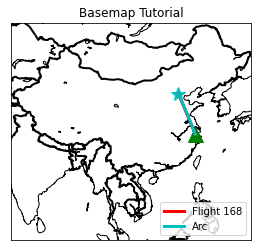

In [9]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

m = Basemap(projection='mill',
            llcrnrlat = 4,
            llcrnrlon = 73,
            urcrnrlat = 54,
            urcrnrlon = 135,
            resolution='l')

m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')
#m.drawcounties(color='darkred')
#m.fillcontinents()
#m.etopo()
#m.bluemarble()

xs = []
ys = []

BJlat, BJlon = 39.56, 116.20
xpt, ypt = m(BJlon, BJlat)
xs.append(xpt)
ys.append(ypt)
m.plot(xpt, ypt, 'c*', markersize=15)

SHlat, SHlon = 30.4, 120.52
xpt, ypt = m(SHlon, SHlat)
xs.append(xpt)
ys.append(ypt)
m.plot(xpt, ypt, 'g^', markersize=15)

m.plot(xs, ys, color='r', linewidth=3, label='Flight 168')
m.drawgreatcircle(BJlon, BJlat, SHlon, SHlat, color='c', linewidth=3, label='Arc')


plt.legend(loc=4)
plt.title('Basemap Tutorial')
plt.show()

[[-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 ...
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]]
[[-30.  -30.  -30.  ... -30.  -30.  -30. ]
 [-29.5 -29.5 -29.5 ... -29.5 -29.5 -29.5]
 [-29.  -29.  -29.  ... -29.  -29.  -29. ]
 ...
 [ 28.5  28.5  28.5 ...  28.5  28.5  28.5]
 [ 29.   29.   29.  ...  29.   29.   29. ]
 [ 29.5  29.5  29.5 ...  29.5  29.5  29.5]]
[[-0.00982064 -0.0113957  -0.01319036 ... -0.01522953 -0.01319036
  -0.0113957 ]
 [-0.0113957  -0.01322338 -0.01530587 ... -0.01767209 -0.01530587
  -0.01322338]
 [-0.01319036 -0.01530587 -0.01771632 ... -0.02045518 -0.01771632
  -0.01530587]
 ...
 [-0.01200234 -0.01414685 -0.01660867 ...  0.02918791  0.03019517
   0.03085725]
 [-0.01097235 -0.01288301 -0.01507265 ...  0.01583738  0.01709512
   0.01804782]
 [-0.00988645 -0.01157475 -0.01350698 ...  0.00702321  0.00838

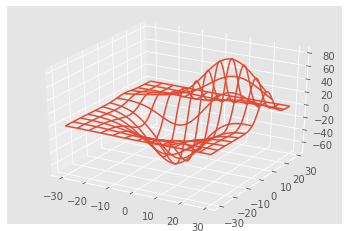

In [23]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style
style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

print(X)
print(Y)
print(Z)
print(axes3d.__file__)
# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()